### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 10
generations = 500
name = 'centered5'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize)

2023-02-13 22:03:22,291	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-13 22:03:24] INFO     < 5680> evotorch.core: Instance of `Custom_NEProblem` (id:4413302112) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-13 22:03:24] INFO     < 5680> evotorch.core: Instance of `Custom_NEProblem` (id:4413302112) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-13 22:03:24] INFO     < 5680> evotorch.core: Instance of `Custom_NEProblem` (id:4413302112) -- The `device` of the problem is set as cpu
[2023-02-13 22:03:24] INFO     < 5680> evotorch.core: Instance of `Custom_NEProblem` (id:4413302112) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-13 22:03:24] INFO     < 5680> evotorch.core: Instance of `Custom_NEProblem` (id:4413302112) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.1974)
    mean_eval : -2696.958984375
pop_best_eval : -2653.47607421875
  median_eval : -2687.32763671875

         iter : 2
     stepsize : ReadOnlyTensor(0.1950)
    mean_eval : -2836.341064453125
pop_best_eval : -2586.9052734375
  median_eval : -2881.0078125

         iter : 3
     stepsize : ReadOnlyTensor(0.1928)
    mean_eval : -2238.556640625
pop_best_eval : -1409.1358642578125
  median_eval : -2490.34326171875

         iter : 4
     stepsize : ReadOnlyTensor(0.1908)
    mean_eval : -1875.772705078125
pop_best_eval : -661.3455810546875
  median_eval : -1820.0166015625

         iter : 5
     stepsize : ReadOnlyTensor(0.1889)
    mean_eval : -1261.3568115234375
pop_best_eval : 200.0
  median_eval : -1398.32421875

         iter : 6
     stepsize : ReadOnlyTensor(0.1872)
    mean_eval : -1620.468017578125
pop_best_eval : -299.1849365234375
  median_eval : -2079.748779296875

         iter : 7
     stepsize : ReadOnlyTensor(0.1855

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'])

#### Visualize trained network

In [6]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer()
network(graph, 0)

(Data(x=[40, 5], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0)

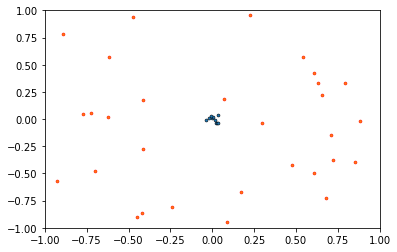

In [7]:
anim = visualizer.animate_organism(graph, network, food=30, frames=300)
visualizer.save_animation_to_gif(anim, name, 10)

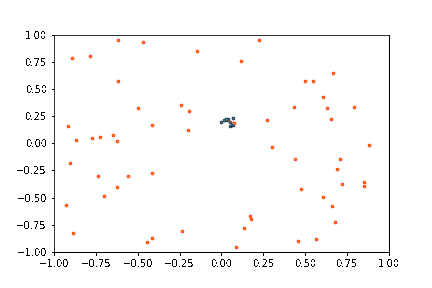

In [25]:
Image('../animation/' + name + '.gif')

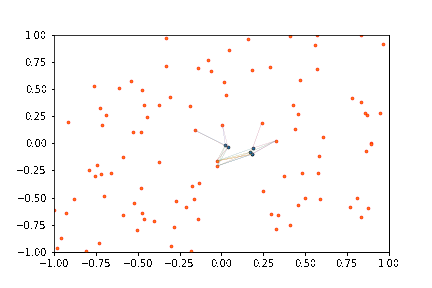

In [9]:
Image('../animation/GATConv1.gif')

In [10]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [11]:
print(network)

SpatioTemporal(
  (conv_layers): A3TGCN(
    (_base_tgcn): TGCN(
      (conv_z): GCNConv(5, 5)
      (linear_z): Linear(in_features=10, out_features=5, bias=True)
      (conv_r): GCNConv(5, 5)
      (linear_r): Linear(in_features=10, out_features=5, bias=True)
      (conv_h): GCNConv(5, 5)
      (linear_h): Linear(in_features=10, out_features=5, bias=True)
    )
  )
  (mlp): Sequential(
    (0): Linear(in_features=5, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=3, bias=True)
    (3): ReLU()
  )
)


In [12]:
print(network.conv_layers)
for param in network.conv_layers.parameters():
  print(param.data)

A3TGCN(
  (_base_tgcn): TGCN(
    (conv_z): GCNConv(5, 5)
    (linear_z): Linear(in_features=10, out_features=5, bias=True)
    (conv_r): GCNConv(5, 5)
    (linear_r): Linear(in_features=10, out_features=5, bias=True)
    (conv_h): GCNConv(5, 5)
    (linear_h): Linear(in_features=10, out_features=5, bias=True)
  )
)
tensor([-0.4312, -0.4678,  1.1730, -2.8226, -0.2079,  1.4506,  1.6973, -2.8838])
tensor([ 0.0305,  0.0219,  1.6645, -0.3433, -1.3641])
tensor([[ 0.8290,  0.4144, -1.0197,  2.7622, -1.8543],
        [ 2.3726,  0.9867, -1.2777, -1.1362, -3.5340],
        [-1.8419, -0.0216,  0.6068,  0.2139, -0.1929],
        [ 0.7419, -3.0034,  3.8165,  1.8240, -0.1873],
        [-2.1419,  2.0022,  3.4273,  1.7067,  2.3052]])
tensor([[-8.3135e-01,  3.6431e+00,  2.9262e-01,  7.3888e-01,  2.7633e+00,
          1.0838e+00,  9.5688e-01, -1.0932e+00, -8.3994e-01, -4.5476e-01],
        [ 6.8818e-01, -4.3547e+00, -1.0808e-01, -2.0016e-01, -1.8980e+00,
          4.3181e-01, -3.9893e-01,  3.0690e+00, 

In [13]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>